# Financial Planning using APIs


In [1]:
# Initial imports.
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Loading .env enviroment variables.
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Setting current amount of crypto assets.
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Adding format specifier to request url.
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"

In [6]:
# Fetching current BTC price.
current_btc_price = requests.get(btc_url)
current_btc_content = current_btc_price.content
print(current_btc_content)

b'{\n\t"data": {\n\t\t"1": {\n\t\t\t"id": 1,\n\t\t\t"name": "Bitcoin",\n\t\t\t"symbol": "BTC",\n\t\t\t"website_slug": "bitcoin",\n\t\t\t"rank": 1,\n\t\t\t"circulating_supply": 18924337,\n\t\t\t"total_supply": 18924337,\n\t\t\t"max_supply": 21000000,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 42284.0000000000000000,\n\t\t\t\t\t"volume_24h": 21830500146,\n\t\t\t\t\t"market_cap": 798510063291,\n\t\t\t\t\t"percentage_change_1h": 1.0929581360011700,\n\t\t\t\t\t"percentage_change_24h": 2.2814496810585700,\n\t\t\t\t\t"percentage_change_7d": -11.5701761581695000,\n\t\t\t\t\t"percent_change_1h": 1.0929581360011700,\n\t\t\t\t\t"percent_change_24h": 2.2814496810585700,\n\t\t\t\t\t"percent_change_7d": -11.5701761581695000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1641747841\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1641747841,\n\t\t"num_cryptocurrencies": 3105,\n\t\t"error": null\n\t}\n}'


In [7]:
# Formatting BTC Price as json.
btc_json = current_btc_price.json()
print(json.dumps(btc_json, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18924337,
            "total_supply": 18924337,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 42284.0,
                    "volume_24h": 21830500146,
                    "market_cap": 798510063291,
                    "percentage_change_1h": 1.09295813600117,
                    "percentage_change_24h": 2.28144968105857,
                    "percentage_change_7d": -11.5701761581695,
                    "percent_change_1h": 1.09295813600117,
                    "percent_change_24h": 2.28144968105857,
                    "percent_change_7d": -11.5701761581695
                }
            },
            "last_updated": 1641747841
        }
    },
    "metadata": {
        "timestamp": 1641747841,
        "num_cryptoc

In [8]:
# Fetching current ETH price.
current_eth_price = requests.get(eth_url)
current_eth_content = current_eth_price.content
print(current_eth_content)

b'{\n\t"data": {\n\t\t"1027": {\n\t\t\t"id": 1027,\n\t\t\t"name": "Ethereum",\n\t\t\t"symbol": "ETH",\n\t\t\t"website_slug": "ethereum",\n\t\t\t"rank": 2,\n\t\t\t"circulating_supply": 119090810,\n\t\t\t"total_supply": 119090810,\n\t\t\t"max_supply": 0,\n\t\t\t"quotes": {\n\t\t\t\t"USD": {\n\t\t\t\t\t"price": 3159.6100000000000000,\n\t\t\t\t\t"volume_24h": 15953859215,\n\t\t\t\t\t"market_cap": 375177478370,\n\t\t\t\t\t"percentage_change_1h": 1.5789316066145100,\n\t\t\t\t\t"percentage_change_24h": 0.7060277691239170,\n\t\t\t\t\t"percentage_change_7d": -16.4194098925263000,\n\t\t\t\t\t"percent_change_1h": 1.5789316066145100,\n\t\t\t\t\t"percent_change_24h": 0.7060277691239170,\n\t\t\t\t\t"percent_change_7d": -16.4194098925263000\n\t\t\t\t}\n\t\t\t},\n\t\t\t"last_updated": 1641747687\n\t\t}\n\t},\n\t"metadata": {\n\t\t"timestamp": 1641747687,\n\t\t"num_cryptocurrencies": 3105,\n\t\t"error": null\n\t}\n}'


In [9]:
# Formatting ETH Price as json.
eth_json = current_eth_price.json()
print(json.dumps(eth_json, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 119090810,
            "total_supply": 119090810,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 3159.61,
                    "volume_24h": 15953859215,
                    "market_cap": 375177478370,
                    "percentage_change_1h": 1.57893160661451,
                    "percentage_change_24h": 0.706027769123917,
                    "percentage_change_7d": -16.4194098925263,
                    "percent_change_1h": 1.57893160661451,
                    "percent_change_24h": 0.706027769123917,
                    "percent_change_7d": -16.4194098925263
                }
            },
            "last_updated": 1641747687
        }
    },
    "metadata": {
        "timestamp": 1641747687,
        "num_cr

In [10]:
# Computing current value of my crpto.
my_btc_value = btc_json['data']['1']['quotes']['USD']['price']
my_eth_value = eth_json['data']['1027']['quotes']['USD']['price']

# Printting current crypto wallet balance.
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42284.00
The current value of your 5.3 ETH is $3159.61


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Setting current amount of shares.
my_agg = 200
my_spy = 50

In [12]:
# Setting Alpaca API key and secret.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Creating the Alpaca API object.
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [13]:
# Formating current date as ISO format.
today = pd.Timestamp("2021-06-01", tz="America/Chicago").isoformat()

# Setting the tickers
tickers = ["AGG", "SPY"]

# Setting timeframe to '1D' for Alpaca API.
timeframe = "1D"

# Getting current closing prices for SPY and AGG.
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Previewing DataFrame.
df_portfolio

AGG                                      SPY  \
                            open   high      low   close   volume    open   
time                                                                        
2021-06-01 00:00:00-04:00  114.4  114.4  114.164  114.34  5655159  422.57   

                                                            
                             high    low   close    volume  
time                                                        
2021-06-01 00:00:00-04:00  422.72  419.2  419.63  47607950

In [14]:
# Picking AGG and SPY close prices.
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Printing AGG and SPY close prices.
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.34
Current SPY closing price: $419.63


In [15]:
# Computing the current value of shares.
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share.
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22868.00
The current value of your 50 SPY shares is $20981.50


### Savings Health Analysis

In [16]:
# Setting monthly household income.
monthly_income = 12000

# Setting Crypto and Share Amounts.
amount_df = {
    "amount": [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
}

# Setting Assets.
assets = ["crypto","shares"]

# Creating savings DataFrame.
df_savings = pd.DataFrame(amount_df, index = assets)

# Displaying savings DataFrame.
display(df_savings)

,amount
crypto,45443.61
shares,43849.50


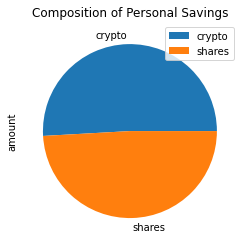

In [17]:
# Plotting savings pie chart.
df_savings.plot.pie(y = "amount", title = "Composition of Personal Savings");

In [18]:
# Setting ideal emergency fund.
emergency_fund = monthly_income * 3

# Calculating total amount of savings.
total_savings = df_savings.sum().item()

# Validating saving health.
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congradulations! You have reached your financial goal.")
else:
    print(f"You are {round(emergency_fund - total_savings, 2)} away from reaching your goal")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Setting start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-01', tz='America/New_York').isoformat()

In [20]:
# Setting the AGG and SPY tickers.
ticker = ["AGG","SPY"]

# Setting timeframe to '1D'.
timeframe = "1D"

# Getting 5 years' worth of historical data for SPY and AGG.
df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Displaying sample data.
df_stock_data.head()

AGG                                         SPY  \
                             open      high     low    close   volume    open   
time                                                                            
2017-06-12 00:00:00-04:00  109.51  109.6958  109.47  109.555  1184601  243.14   
2017-06-13 00:00:00-04:00  109.43  109.6000  109.43  109.580  1324388  243.99   
2017-06-14 00:00:00-04:00  110.00  110.1800  109.85  109.950  2304819  244.86   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779  242.68   
2017-06-16 00:00:00-04:00  109.86  109.9700  109.85  109.945  1709677  242.77   

                                                               
                             high       low   close    volume  
time                                                           
2017-06-12 00:00:00-04:00  243.42  242.3800  243.34  57096569  
2017-06-13 00:00:00-04:00  244.61  243.5799  244.52  43470532  
2017-06-14 00:00:00-04:00  244.87  243.2900  244.26  55098826  
2017-06-15 00:00:00-04:00  243.91  242.3600  243.79  51523068  
2017-06-16 00:00:00-04:00  242.83  241.6337  242.63  48998243

In [21]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns.
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [22]:
# Printing the simulation input data.
MC_thirty_year.portfolio_data.head()

AGG                                      \
                             open      high     low    close   volume   
time                                                                    
2017-06-12 00:00:00-04:00  109.51  109.6958  109.47  109.555  1184601   
2017-06-13 00:00:00-04:00  109.43  109.6000  109.43  109.580  1324388   
2017-06-14 00:00:00-04:00  110.00  110.1800  109.85  109.950  2304819   
2017-06-15 00:00:00-04:00  109.90  109.9000  109.78  109.870  1938779   
2017-06-16 00:00:00-04:00  109.86  109.9700  109.85  109.945  1709677   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2017-06-12 00:00:00-04:00          NaN  243.14  243.42  242.3800  243.34   
2017-06-13 00:00:00-04:00     0.000228  243.99  244.61  243.5799  244.52   
2017-06-14 00:00:00-04:00     0.003377  244.86  244.87  243.2900  244.26   
2017-06-15 00:00:00-04:00    -0.000728  242.68  243.91  242.3600  243.79   
2017-06-16 00:00:00-04:00     0.000683  242.77  242.83  241.6337  242.63   

                                                  
                             volume daily_return  
time                                              
2017-06-12 00:00:00-04:00  57096569          NaN  
2017-06-13 00:00:00-04:00  43470532     0.004849  
2017-06-14 00:00:00-04:00  55098826    -0.001063  
2017-06-15 00:00:00-04:00  51523068    -0.001924  
2017-06-16 00:00:00-04:00  48998243    -0.004758

In [23]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns.
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.013595,1.000470,0.995697,1.005801,0.991844,0.998553,1.004939,0.998311,1.003122,0.988819,...,1.003432,1.010157,0.994837,1.008448,0.996842,1.009156,0.995358,0.995405,0.987767,0.999310
2,1.024468,0.998268,0.991128,1.008721,0.986013,0.994289,0.998358,0.999570,0.999534,0.992161,...,1.007975,1.018705,0.993145,1.001577,1.000707,1.013297,0.998883,0.994294,0.990413,0.995337
3,1.023643,1.002234,0.991089,1.007737,0.994060,1.000660,1.012284,0.998377,0.985807,0.984136,...,1.000259,1.024562,0.994906,1.001843,0.988924,1.016338,0.985793,1.007407,0.988346,1.005556
4,1.020661,1.002654,1.004812,1.025615,1.001895,1.003067,1.007011,0.996797,0.978024,0.970360,...,1.001338,1.024804,0.982655,1.009729,0.985969,1.007159,0.985863,1.023824,0.992343,1.002192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,49.227501,9.450941,36.339280,12.460648,47.741505,11.755275,42.114102,24.007382,29.004793,12.276269,...,6.085267,10.648357,18.764831,7.648105,42.139349,28.720928,24.190525,11.149400,15.897836,15.830012
7557,48.744852,9.474375,36.181972,12.378937,47.153784,11.841639,42.012534,24.270042,29.414356,12.409439,...,6.082746,10.592980,18.889299,7.642699,42.404118,28.871175,24.392799,11.243767,15.972760,15.947589
7558,48.450071,9.507927,36.222302,12.514154,47.332690,11.904913,42.933528,24.234967,29.154101,12.376622,...,6.102407,10.467746,18.859073,7.658882,42.738132,28.716004,24.613802,11.116713,15.796950,15.834898
7559,47.945112,9.514525,36.637014,12.353680,46.663585,11.830663,42.811697,24.171458,29.455731,12.586639,...,6.095798,10.412571,18.667783,7.695625,42.821038,28.856980,24.619525,11.263983,16.114750,15.965345


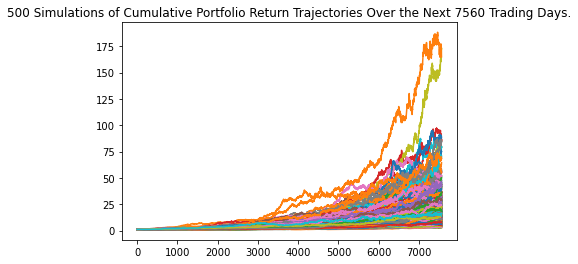

In [24]:
# Plotting simulation outcomes.
line_plot = MC_thirty_year.plot_simulation()

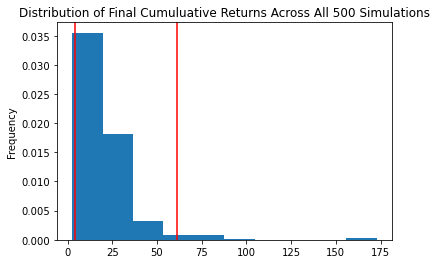

In [25]:
# Plotting probability distribution and confidence intervals.
dist_plot = MC_thirty_year.plot_distribution()

# Saving the plot for future usage.
dist_plot.get_figure().savefig('MC_thirty_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [26]:
# Fetching summary statistics from the Monte Carlo simulation results.
tbl = MC_thirty_year.summarize_cumulative_return()

# Printing summary statistics.
print(tbl)

count           500.000000
mean             20.143381
std              16.776478
min               2.599978
25%              10.285403
50%              16.218266
75%              24.571033
max             172.695495
95% CI Lower      4.387572
95% CI Upper     61.103227
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Setting initial investment.
initial_investment = 20000

# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000.
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Printing results.
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $87751.44 and $1222064.54


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Setting initial investment.
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8] * initial_investment,2)
ci_upper = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $131627.16 and $1833096.81


## Early Retirement


### Five Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [30]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015661,1.001009,0.993164,0.996434,1.011261,1.006381,1.005317,1.015455,0.995633,0.995419,...,0.989026,1.005900,0.992969,0.986238,1.004466,1.011615,1.007498,1.008122,1.007684,1.004035
2,1.023167,1.002820,1.003297,1.015403,1.017209,1.002283,1.005388,0.998594,1.000078,0.998500,...,0.992694,1.020325,0.984916,0.980356,0.995590,1.016032,1.015078,0.993392,1.006402,1.006913
3,1.035970,0.993099,0.998317,1.005775,1.012555,0.996288,0.995712,1.011775,1.000343,0.981442,...,0.987318,1.037764,0.991625,0.983247,0.990573,1.007470,1.012230,0.996485,1.019312,1.003537
4,1.013961,0.985223,0.974377,0.998572,0.996357,0.988574,1.011188,1.015952,0.996625,0.989179,...,0.989668,1.029775,0.994477,0.962412,0.996329,1.008679,1.010258,0.990813,1.010898,1.006192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.046063,1.903781,2.535735,1.054288,1.337248,2.077163,1.694825,2.114324,1.389860,1.716995,...,3.067668,1.130080,1.480455,1.171573,1.988012,1.410536,2.559212,1.005015,2.387702,2.135431
1257,1.045364,1.925130,2.537215,1.039485,1.329912,2.106246,1.680130,2.131772,1.397726,1.729998,...,3.027853,1.128676,1.487434,1.166496,1.966610,1.421660,2.571882,1.001193,2.394521,2.144324
1258,1.044461,1.936845,2.524339,1.042945,1.315839,2.091351,1.676497,2.132829,1.400363,1.730894,...,3.030026,1.139294,1.484450,1.156285,1.957354,1.416120,2.572184,0.993618,2.399858,2.115479
1259,1.048448,1.935029,2.507894,1.045601,1.320752,2.081827,1.659894,2.143163,1.388141,1.733037,...,3.031454,1.128959,1.479421,1.158290,1.974644,1.416293,2.569565,0.991011,2.428314,2.120478


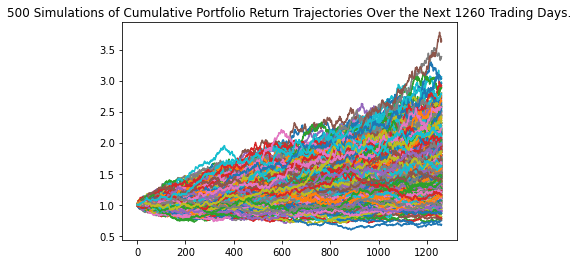

In [31]:
# Plot simulation outcomes
line_plot = MC_five_year.plot_simulation()

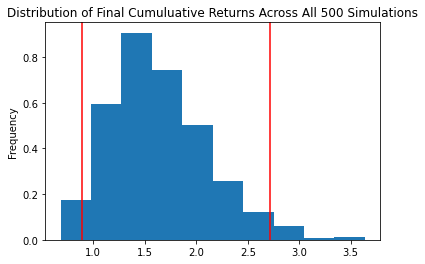

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_five_year.plot_distribution()

# Saving the plot for future usage.
dist_plot.get_figure().savefig('MC_five_year_dist_plot.png',bbox_inches='tight')

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.636594
std               0.470200
min               0.681723
25%               1.290434
50%               1.576222
75%               1.907742
max               3.637486
95% CI Lower      0.893528
95% CI Upper      2.712281
Name: 1260, dtype: float64


In [34]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000.
ci_lower_five = round(tbl[8] * initial_investment,2)
ci_upper_five = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53611.71 and $162736.87


### Ten Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [36]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987845,0.997564,0.996557,1.003671,0.987346,0.999503,1.008923,0.992556,1.000060,0.990923,...,0.994328,0.989806,1.001176,0.999441,0.994213,1.004860,0.994798,0.991805,1.004198,1.000149
2,0.988076,0.998531,0.986315,1.004024,0.977915,1.012306,1.012420,1.000241,0.997386,0.976871,...,0.995071,0.997754,0.998014,1.000658,0.991608,1.002120,0.997727,0.989633,0.994977,1.011118
3,0.986720,0.993142,0.987579,0.996554,0.978437,1.007889,1.015909,1.003027,0.998732,0.972862,...,0.996377,1.014393,0.999398,1.002881,0.988398,0.997010,1.007379,0.994506,0.988590,1.014104
4,0.985248,0.981873,0.992337,0.992974,0.982345,0.996087,1.012477,0.996773,0.994477,0.954103,...,0.990532,1.005600,1.005621,1.011628,0.989152,0.991664,1.024915,0.986242,0.984359,1.028341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.260690,1.183232,3.291076,3.198201,2.073912,2.043916,2.562650,1.185569,6.539994,1.671811,...,3.415169,2.723591,2.216144,2.566466,5.708771,3.423355,4.626947,2.972141,2.206131,1.568359
2517,1.263440,1.178573,3.279045,3.183322,2.116585,2.054502,2.543813,1.185830,6.628042,1.683465,...,3.391780,2.735583,2.224283,2.602068,5.730244,3.431307,4.708189,2.947877,2.187461,1.565048
2518,1.276723,1.193389,3.234083,3.224046,2.120433,2.036835,2.528718,1.197201,6.629778,1.689524,...,3.384690,2.727753,2.240929,2.626722,5.687755,3.382524,4.718219,2.962666,2.199268,1.572030
2519,1.276707,1.195268,3.207980,3.236448,2.136702,2.042902,2.554769,1.204869,6.634395,1.690886,...,3.345766,2.726513,2.249294,2.627345,5.648898,3.391622,4.748446,2.937502,2.205351,1.566974


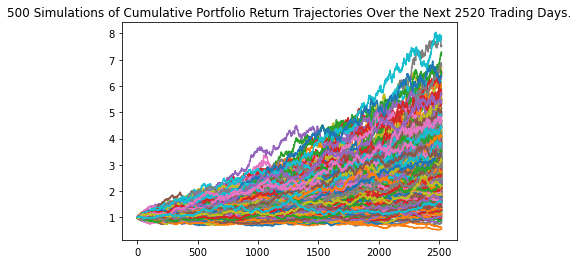

In [37]:
# Plot simulation outcomes
line_plot = MC_ten_year.plot_simulation()

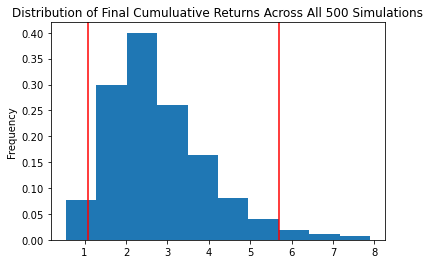

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_ten_year.plot_distribution()

# Saving the plot for future usage.
dist_plot.get_figure().savefig('MC_ten_year_dist_plot.png',bbox_inches='tight')

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.790854
std               1.195609
min               0.546889
25%               1.932627
50%               2.529783
75%               3.394237
max               7.895560
95% CI Lower      1.076578
95% CI Upper      5.700795
Name: 2520, dtype: float64


In [40]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000.
ci_lower_ten = round(tbl[8] * initial_investment,2)
ci_upper_ten = round(tbl[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $64594.67 and $342047.7
